# Coding Logistic Regression From Scratch - Lab

## Introduction

In this lab, you'll practice your ability to translate mathematical algorithms into python functions. This will deepen and solidify your understanding of the logistic regression!

## Objectives

You will be able to:
* Understand and implement logistic regression

## Overview

Recall that the logistic regression algorithm take our previous intuition from logistic regression. In logistic regression, we start by taking our input data, X and multiplying it by a vector of weights for each of the individual features, which produces our output y. Afterwards we'll work on using an iterative approach via gradient descent to tune these weights.

## Linear Regression Setup

Write a simple function `predict_y` that takes in a matrix `X` of observations and a vector of feature weights `w` and outputs a vector of predictions for the various observations.

Recall that this is the sum of the product of each of the feature observations and their corresponding feature weights:  
$ \hat{y}_i = X_{i1} \bullet w_1 + X_{i2} \bullet w_2 + X_{i3} \bullet w_3 + ... + X_{in} \bullet w_n$

Hint: think about which mathematical operation we previously discussed that will take a matrix (X) and multiply it by a vector of weights (w) to succinctly do this in a single operation.

In [1]:
#Your code here
import numpy as np

def predict_y(X, w):
    return np.matmul(X, w)

## The Sigmoid Function

Recall that the sigmoid function is used to map our previous linear regression model to a range of 0 to 1, satisfying basic premises of probability. As a reminder, the sigmoid function is defined by:  
$\frac{1}{1+e^(-x)}$  
Write this as a python function where x is the input and the function outputs the result of the sigmoid function.

In [2]:
#Your code here
def sigmoid(x):
    return 1/(1+np.exp(-x))

## Graphing the Sigmoid

For good measure, let's do a brief investigation of your new function. Graph the output of your sigmoid function using 10,000 X values evenly spaced from -20 to 20.

In [3]:
#Your code here
import matplotlib.pyplot as plt

X_space = np.linspace(-20, 20, 10000)
y_space = [sigmoid(x) for x in X_space]
plt.plot(X_space, y_space)
plt.show()

<Figure size 640x480 with 1 Axes>

## Gradient Descent with the Sigmoid Function

Recall that gradient descent is a numerical method for finding a minimum to a cost function. In the case of logistic regression, we are looking to minimize the error between our model's predictions and the actual data labels. To do this, we first calculate an error vector based on the current model's feature weights. We then multiply the transpose of the training matrix itself by this error vector in order to obtain the gradient. Finally, we take the gradient, multiply it by our step size and add this to our current weight vector to update it. Below, write such a function. It will take 5 inputs:  
* X
* y
* max_iterations
* alpha (the step size)
* initial_weights  
By default, have your function set the initial_weights parameter to a vector where all feature weights are set to 1.

In [32]:
# Your code here
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    weights = np.array(initial_weights)
    if not initial_weights:
        weights = np.ones(X.shape[1])
    
    weights_array = weights
    #Create a for loop of iterations
    iter = 0
    prev_step_size = 1
    while (iter < max_iterations) & (prev_step_size > 0.000001):
        #Generate predictions using the current feature weights
        y_hat = [sigmoid(x) for x in predict_y(X, weights)]
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y_hat - y
        print('Prev_step_size: {} Error Sum: {}'.format(prev_step_size, sum(error_vector)))

        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector) 
        
        #Update the weight vector take a step of alpha in direction of gradient 
        weights = weights - alpha * gradient
        weights_array = np.vstack((weights_array, weights))
        
        prev_step_size = np.linalg.norm(alpha * gradient)
        iter += 1
    #Return finalized Weights
    print(iter)
    return weights, weights_array

## Running Your Algorithm

Now that we've coded everything from the ground up, we can further investigate the convergence behavior of our gradient descent algorithm. Remember that gradient descent does not gaurantee a global minimum, only a local minimum, and that small deviations in the starting point or step size can lead to different outputs.  
  
Let's begin by running our algorithm and plotting the successive weights of the features through iterations. Below is a dataset, with X and y predefined for you. Use your logistic regression function to find train a model. As the model trains, record the iteration cycle of the gradient descent algorithm and the weights of the various features. Then, plot this data on subplots for each of the individual features. Each graph should have the iteration number on the x-axis and the value of that feature weight for that iteration cycle on the y-axis. This will visually display how the algorithm is adjusting the weights over successive iterations, and hopefully show convergence on stable weights.

In [33]:
import pandas as pd
df = pd.read_csv('heart.csv')
X = df[df.columns[:-1]]
y = df.target
print(y.value_counts())
X.head()

1.0    165
0.0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [34]:
weights, weights_array = grad_desc(X, y, 10000, alpha=0.005)


Prev_step_size: 1 Error Sum: 135.57050120848373
Prev_step_size: 1.2035834570423403 Error Sum: 125.69267290786783
Prev_step_size: 1.1298197272344044 Error Sum: 81.57398796672395
Prev_step_size: 0.7769787009714834 Error Sum: 9.895315262399981
Prev_step_size: 0.25439310788705255 Error Sum: -4.198009970446179
Prev_step_size: 0.20267553863210144 Error Sum: -3.8926463867112227
Prev_step_size: 0.1853725609132668 Error Sum: -3.6693576022034335
Prev_step_size: 0.17022884802060945 Error Sum: -3.4739695540791473
Prev_step_size: 0.15697471853195544 Error Sum: -3.304355956247855
Prev_step_size: 0.1453560637844324 Error Sum: -3.1577057552265804
Prev_step_size: 0.13514419162859112 Error Sum: -3.0310708839497535
Prev_step_size: 0.12613890613462758 Error Sum: -2.9216562296314694
Prev_step_size: 0.1181678290251475 Error Sum: -2.8269457482085585
Prev_step_size: 0.11108397510039987 Error Sum: -2.7447404679812237
Prev_step_size: 0.1047626927805284 Error Sum: -2.6731520592708193
Prev_step_size: 0.0990985466

Prev_step_size: 0.012376623842691746 Error Sum: -1.793959860869533
Prev_step_size: 0.012291041201392374 Error Sum: -1.7922299860146118
Prev_step_size: 0.01220668106042113 Error Sum: -1.7905062503938582
Prev_step_size: 0.01212351845236629 Error Sum: -1.7887885827506915
Prev_step_size: 0.012041529040430664 Error Sum: -1.7870769149700845
Prev_step_size: 0.011960689098980156 Error Sum: -1.7853711819362754
Prev_step_size: 0.011880975494821805 Error Sum: -1.7836713213968434
Prev_step_size: 0.01180236566917857 Error Sum: -1.7819772738319053
Prev_step_size: 0.01172483762033031 Error Sum: -1.7802889823295631
Prev_step_size: 0.011648369886891564 Error Sum: -1.7786063924661013
Prev_step_size: 0.01157294153169866 Error Sum: -1.7769294521918386
Prev_step_size: 0.011498532126280017 Error Sum: -1.7752581117213788
Prev_step_size: 0.011425121735883602 Error Sum: -1.7735923234286552
Prev_step_size: 0.011352690905039268 Error Sum: -1.771932041746748
Prev_step_size: 0.011281220643632222 Error Sum: -1.7702

Prev_step_size: 0.006392935044601181 Error Sum: -1.6000876862448654
Prev_step_size: 0.006370783545116304 Error Sum: -1.5989887657693558
Prev_step_size: 0.006348770555049828 Error Sum: -1.597893571990496
Prev_step_size: 0.006326894486652973 Error Sum: -1.5968020938594432
Prev_step_size: 0.006305153777597763 Error Sum: -1.5957143203136275
Prev_step_size: 0.00628354689050593 Error Sum: -1.5946302402769197
Prev_step_size: 0.006262072312487546 Error Sum: -1.593549842660951
Prev_step_size: 0.006240728554688717 Error Sum: -1.592473116365334
Prev_step_size: 0.006219514151849014 Error Sum: -1.5914000502792651
Prev_step_size: 0.006198427661867255 Error Sum: -1.5903306332815887
Prev_step_size: 0.00617746766537629 Error Sum: -1.589264854242022
Prev_step_size: 0.006156632765326731 Error Sum: -1.5882027020217566
Prev_step_size: 0.006135921586578268 Error Sum: -1.5871441654743808
Prev_step_size: 0.006115332775500116 Error Sum: -1.5860892334465446
Prev_step_size: 0.0060948649995787325 Error Sum: -1.58

Prev_step_size: 0.00423090351074291 Error Sum: -1.4803601815514824
Prev_step_size: 0.004219318039608624 Error Sum: -1.4796693527566784
Prev_step_size: 0.004207776433890009 Error Sum: -1.4789808506279982
Prev_step_size: 0.004196278431050767 Error Sum: -1.4782946665963974
Prev_step_size: 0.004184823771220944 Error Sum: -1.4776107921228647
Prev_step_size: 0.004173412197158546 Error Sum: -1.476929218698575
Prev_step_size: 0.004162043454212004 Error Sum: -1.4762499378447975
Prev_step_size: 0.0041507172902835 Error Sum: -1.4755729411129663
Prev_step_size: 0.004139433455792123 Error Sum: -1.4748982200844198
Prev_step_size: 0.004128191703638662 Error Sum: -1.4742257663707297
Prev_step_size: 0.0041169917891701905 Error Sum: -1.4735555716131647
Prev_step_size: 0.004105833470145518 Error Sum: -1.4728876274832987
Prev_step_size: 0.004094716506701379 Error Sum: -1.472221925682427
Prev_step_size: 0.00408364066131888 Error Sum: -1.4715584579417718
Prev_step_size: 0.004072605698790415 Error Sum: -1.47

Prev_step_size: 0.003088854587612952 Error Sum: -1.4114400651212682
Prev_step_size: 0.0030812072620775995 Error Sum: -1.4109767812055223
Prev_step_size: 0.003073584147666612 Error Sum: -1.410514989230169
Prev_step_size: 0.0030659851440854448 Error Sum: -1.4100546838046335
Prev_step_size: 0.003058410151648891 Error Sum: -1.4095958595597988
Prev_step_size: 0.003050859071274898 Error Sum: -1.4091385111474795
Prev_step_size: 0.003043331804479101 Error Sum: -1.4086826332407267
Prev_step_size: 0.003035828253368566 Error Sum: -1.4082282205336822
Prev_step_size: 0.003028348320636497 Error Sum: -1.4077752677412234
Prev_step_size: 0.0030208919095562584 Error Sum: -1.4073237695991945
Prev_step_size: 0.003013458923976111 Error Sum: -1.4068737208641608
Prev_step_size: 0.003006049268313373 Error Sum: -1.4064251163133377
Prev_step_size: 0.0029986628475494183 Error Sum: -1.4059779507445738
Prev_step_size: 0.002991299567224045 Error Sum: -1.4055322189762631
Prev_step_size: 0.0029839593334301936 Error S

Prev_step_size: 0.002166716979013592 Error Sum: -1.3560325198784615
Prev_step_size: 0.0021618303149764976 Error Sum: -1.3557429472743352
Prev_step_size: 0.0021569574558226528 Error Sum: -1.3554542541743224
Prev_step_size: 0.002152098353762827 Error Sum: -1.3551664375724344
Prev_step_size: 0.0021472529612081765 Error Sum: -1.3548794944740181
Prev_step_size: 0.0021424212307690985 Error Sum: -1.354593421895841
Prev_step_size: 0.0021376031152540126 Error Sum: -1.3543082168660125
Prev_step_size: 0.002132798567668148 Error Sum: -1.3540238764239223
Prev_step_size: 0.0021280075412129867 Error Sum: -1.3537403976200693
Prev_step_size: 0.002123229989284425 Error Sum: -1.3534577775162142
Prev_step_size: 0.0021184658654724116 Error Sum: -1.3531760131852713
Prev_step_size: 0.00211371512355942 Error Sum: -1.3528951017111663
Prev_step_size: 0.002108977717519626 Error Sum: -1.3526150401889037
Prev_step_size: 0.0021042536015177947 Error Sum: -1.3523358257243765
Prev_step_size: 0.002099542729908245 Error

Prev_step_size: 0.0015651479280338338 Error Sum: -1.320973660241425
Prev_step_size: 0.001561890127357045 Error Sum: -1.3207878603331982
Prev_step_size: 0.0015586407284702182 Error Sum: -1.3206025940938164
Prev_step_size: 0.001555399704762722 Error Sum: -1.3204178597968983
Prev_step_size: 0.0015521670297219976 Error Sum: -1.3202336557224306
Prev_step_size: 0.0015489426769331612 Error Sum: -1.3200499801565138
Prev_step_size: 0.0015457266200787946 Error Sum: -1.3198668313914848
Prev_step_size: 0.0015425188329381999 Error Sum: -1.3196842077256399
Prev_step_size: 0.0015393192893873567 Error Sum: -1.3195021074635516
Prev_step_size: 0.0015361279633981384 Error Sum: -1.3193205289157517
Prev_step_size: 0.0015329448290383283 Error Sum: -1.3191394703988175
Prev_step_size: 0.0015297698604708526 Error Sum: -1.3189589302354405
Prev_step_size: 0.001526603031953519 Error Sum: -1.3187789067542104
Prev_step_size: 0.0015234443178386845 Error Sum: -1.3185993982897024
Prev_step_size: 0.0015202936925727947 

Prev_step_size: 0.001166513497294273 Error Sum: -1.2987197516018343
Prev_step_size: 0.0011642439782571898 Error Sum: -1.2985963469737882
Prev_step_size: 0.0011619798368415642 Error Sum: -1.2984732788122382
Prev_step_size: 0.0011597210572544825 Error Sum: -1.2983505460823674
Prev_step_size: 0.0011574676237576002 Error Sum: -1.298228147752639
Prev_step_size: 0.0011552195206669701 Error Sum: -1.2981060827952118
Prev_step_size: 0.0011529767323529732 Error Sum: -1.2979843501855939
Prev_step_size: 0.0011507392432398692 Error Sum: -1.297862948903035
Prev_step_size: 0.001148507037805785 Error Sum: -1.297741877929867
Prev_step_size: 0.0011462801005824336 Error Sum: -1.2976211362523458
Prev_step_size: 0.001144058416154843 Error Sum: -1.2975007228597886
Prev_step_size: 0.0011418419691612929 Error Sum: -1.2973806367451846
Prev_step_size: 0.0011396307442929163 Error Sum: -1.2972608769048932
Prev_step_size: 0.0011374247262937042 Error Sum: -1.2971414423385597
Prev_step_size: 0.001135223899960365 Err

Prev_step_size: 0.0008833282032806436 Error Sum: -1.2837125748750782
Prev_step_size: 0.0008817045551744112 Error Sum: -1.2836291348166928
Prev_step_size: 0.0008800844548914512 Error Sum: -1.2835459110043366
Prev_step_size: 0.0008784678928055533 Error Sum: -1.2834629028041085
Prev_step_size: 0.0008768548593221047 Error Sum: -1.2833801095843875
Prev_step_size: 0.000875245344877632 Error Sum: -1.2832975307154544
Prev_step_size: 0.0008736393399400446 Error Sum: -1.2832151655697244
Prev_step_size: 0.000872036835008201 Error Sum: -1.2831330135215762
Prev_step_size: 0.0008704378206118601 Error Sum: -1.2830510739475045
Prev_step_size: 0.0008688422873118073 Error Sum: -1.2829693462259275
Prev_step_size: 0.0008672502256995805 Error Sum: -1.282887829737438
Prev_step_size: 0.0008656616263971261 Error Sum: -1.2828065238644286
Prev_step_size: 0.0008640764800570677 Error Sum: -1.2827254279914364
Prev_step_size: 0.0008624947773624926 Error Sum: -1.2826445415050642
Prev_step_size: 0.0008609165090265442

Prev_step_size: 0.0006951933620816623 Error Sum: -1.274293824035266
Prev_step_size: 0.0006939678194547408 Error Sum: -1.2742342884538869
Prev_step_size: 0.0006927447811333923 Error Sum: -1.2741749004261964
Prev_step_size: 0.0006915242408117743 Error Sum: -1.2741156595378094
Prev_step_size: 0.0006903061922035255 Error Sum: -1.274056565375536
Prev_step_size: 0.0006890906290418193 Error Sum: -1.2739976175274297
Prev_step_size: 0.0006878775450789049 Error Sum: -1.2739388155829685
Prev_step_size: 0.0006866669340863547 Error Sum: -1.2738801591327387
Prev_step_size: 0.0006854587898549128 Error Sum: -1.2738216477686857
Prev_step_size: 0.0006842531061945018 Error Sum: -1.2737632810841015
Prev_step_size: 0.0006830498769339301 Error Sum: -1.2737050586734662
Prev_step_size: 0.0006818490959211185 Error Sum: -1.2736469801324803
Prev_step_size: 0.0006806507570228142 Error Sum: -1.2735890450581775
Prev_step_size: 0.0006794548541245785 Error Sum: -1.2735312530488692
Prev_step_size: 0.000678261381130696

Prev_step_size: 0.0005491657153015742 Error Sum: -1.2673977552799982
Prev_step_size: 0.000548229992752833 Error Sum: -1.2673549580941956
Prev_step_size: 0.000547296070443321 Error Sum: -1.2673122623665702
Prev_step_size: 0.0005463639441749136 Error Sum: -1.2672696678239936
Prev_step_size: 0.0005454336097617705 Error Sum: -1.267227174194193
Prev_step_size: 0.0005445050630298805 Error Sum: -1.267184781205764
Prev_step_size: 0.0005435782998174643 Error Sum: -1.267142488588046
Prev_step_size: 0.0005426533159745688 Error Sum: -1.2671002960711375
Prev_step_size: 0.0005417301073633681 Error Sum: -1.2670582033861395
Prev_step_size: 0.0005408086698577915 Error Sum: -1.2670162102647358
Prev_step_size: 0.0005398889993438337 Error Sum: -1.2669743164395924
Prev_step_size: 0.0005389710917191327 Error Sum: -1.266932521644057
Prev_step_size: 0.0005380549428933341 Error Sum: -1.2668908256123985
Prev_step_size: 0.0005371405487876122 Error Sum: -1.2668492280794927
Prev_step_size: 0.000536227905334993 Err

Prev_step_size: 0.00044124164935110797 Error Sum: -1.2625957426217824
Prev_step_size: 0.0004405086668306424 Error Sum: -1.262564110402518
Prev_step_size: 0.0004397770273023087 Error Sum: -1.2625325501498885
Prev_step_size: 0.00043904672784746715 Error Sum: -1.2625010616778605
Prev_step_size: 0.00043831776555537547 Error Sum: -1.26246964480092
Prev_step_size: 0.0004375901375231582 Error Sum: -1.2624382993340295
Prev_step_size: 0.0004368638408556216 Error Sum: -1.2624070250928618
Prev_step_size: 0.00043613887266558794 Error Sum: -1.2623758218933954
Prev_step_size: 0.00043541523007346747 Error Sum: -1.2623446895523527
Prev_step_size: 0.00043469291020746076 Error Sum: -1.2623136278868796
Prev_step_size: 0.00043397191020346914 Error Sum: -1.2622826367146702
Prev_step_size: 0.00043325222720515635 Error Sum: -1.2622517158538753
Prev_step_size: 0.00043253385836375955 Error Sum: -1.2622208651233273
Prev_step_size: 0.00043181680083822865 Error Sum: -1.2621900843421878
Prev_step_size: 0.000431101

Prev_step_size: 0.0003516392737466984 Error Sum: -1.2588382406122414
Prev_step_size: 0.00035106707001572644 Error Sum: -1.2588149891849185
Prev_step_size: 0.0003504958711593164 Error Sum: -1.2587917884837403
Prev_step_size: 0.0003499256751384511 Error Sum: -1.25876863838293
Prev_step_size: 0.00034935647991917774 Error Sum: -1.2587455387573372
Prev_step_size: 0.00034878828347272126 Error Sum: -1.2587224894817801
Prev_step_size: 0.00034822108377524245 Error Sum: -1.2586994904317566
Prev_step_size: 0.0003476548788079724 Error Sum: -1.2586765414829637
Prev_step_size: 0.00034708966655717374 Error Sum: -1.2586536425114399
Prev_step_size: 0.00034652544501415517 Error Sum: -1.2586307933935625
Prev_step_size: 0.00034596221217521913 Error Sum: -1.2586079940061596
Prev_step_size: 0.0003453999660415975 Error Sum: -1.2585852442262044
Prev_step_size: 0.0003448387046194992 Error Sum: -1.258562543931227
Prev_step_size: 0.0003442784259201781 Error Sum: -1.2585398929990008
Prev_step_size: 0.000343719127

Prev_step_size: 0.0002850028326633413 Error Sum: -1.2561996176486807
Prev_step_size: 0.00028454582360556974 Error Sum: -1.2561820207287244
Prev_step_size: 0.0002840895920142433 Error Sum: -1.256164460783483
Prev_step_size: 0.00028363413639879395 Error Sum: -1.256146937724944
Prev_step_size: 0.0002831794552720184 Error Sum: -1.2561294514653045
Prev_step_size: 0.0002827255471502028 Error Sum: -1.2561120019170084
Prev_step_size: 0.0002822724105531063 Error Sum: -1.2560945889925912
Prev_step_size: 0.00028182004400384983 Error Sum: -1.2560772126050748
Prev_step_size: 0.0002813684460290305 Error Sum: -1.2560598726675183
Prev_step_size: 0.0002809176151586371 Error Sum: -1.2560425690933297
Prev_step_size: 0.00028046754992603246 Error Sum: -1.2560253017960217
Prev_step_size: 0.00028001824886800383 Error Sum: -1.2560080706895107
Prev_step_size: 0.00027956971052470235 Error Sum: -1.2559908756877425
Prev_step_size: 0.00027912193343966894 Error Sum: -1.2559737167051552
Prev_step_size: 0.00027867491

Prev_step_size: 0.00022616797922538182 Error Sum: -1.2539941133035886
Prev_step_size: 0.0002258097013960273 Error Sum: -1.2539810647266805
Prev_step_size: 0.00022545201658619865 Error Sum: -1.2539680425116488
Prev_step_size: 0.000225094923717682 Error Sum: -1.2539550465982998
Prev_step_size: 0.00022473842171450407 Error Sum: -1.2539420769267529
Prev_step_size: 0.00022438250950323905 Error Sum: -1.2539291334371332
Prev_step_size: 0.00022402718601244683 Error Sum: -1.253916216069892
Prev_step_size: 0.00022367245017329996 Error Sum: -1.2539033247654272
Prev_step_size: 0.0002233183009189738 Error Sum: -1.2538904594644704
Prev_step_size: 0.00022296473718509297 Error Sum: -1.2538776201079087
Prev_step_size: 0.00022261175790952531 Error Sum: -1.2538648066365723
Prev_step_size: 0.00022225936203239648 Error Sum: -1.2538520189916205
Prev_step_size: 0.00022190754849609677 Error Sum: -1.2538392571143473
Prev_step_size: 0.00022155631624530921 Error Sum: -1.2538265209461357
Prev_step_size: 0.0002212

Prev_step_size: 0.00018047665304653604 Error Sum: -1.2523695288784478
Prev_step_size: 0.0001801932398682161 Error Sum: -1.252359706828364
Prev_step_size: 0.00017991028638281674 Error Sum: -1.2523499039259107
Prev_step_size: 0.0001796277917888772 Error Sum: -1.2523401201293094
Prev_step_size: 0.0001793457552866563 Error Sum: -1.252330355396731
Prev_step_size: 0.00017906417607787108 Error Sum: -1.2523206096865658
Prev_step_size: 0.00017878305336587594 Error Sum: -1.252310882957188
Prev_step_size: 0.00017850238635573701 Error Sum: -1.2523011751671285
Prev_step_size: 0.00017822217425386268 Error Sum: -1.252291486275095
Prev_step_size: 0.00017794241626853274 Error Sum: -1.2522818162396603
Prev_step_size: 0.00017766311160940238 Error Sum: -1.252272165019833
Prev_step_size: 0.00017738425948779003 Error Sum: -1.2522625325745156
Prev_step_size: 0.00017710585911652534 Error Sum: -1.2522529188626699
Prev_step_size: 0.0001768279097101649 Error Sum: -1.2522433238435193
Prev_step_size: 0.00017655041

Prev_step_size: 0.00014380863197942597 Error Sum: -1.2511260881782653
Prev_step_size: 0.00014358424189022463 Error Sum: -1.2511186521828206
Prev_step_size: 0.00014336021027246682 Error Sum: -1.2511112302149145
Prev_step_size: 0.00014313653652157305 Error Sum: -1.25110382224516
Prev_step_size: 0.00014291322003408917 Error Sum: -1.2510964282442
Prev_step_size: 0.00014269026020770773 Error Sum: -1.2510890481826338
Prev_step_size: 0.00014246765644117292 Error Sum: -1.2510816820312378
Prev_step_size: 0.00014224540813457512 Error Sum: -1.2510743297607954
Prev_step_size: 0.0001420235146889249 Error Sum: -1.2510669913422012
Prev_step_size: 0.00014180197550647813 Error Sum: -1.2510596667464573
Prev_step_size: 0.00014158078999051488 Error Sum: -1.2510523559445326
Prev_step_size: 0.00014135995754548125 Error Sum: -1.2510450589074966
Prev_step_size: 0.0001411394775770186 Error Sum: -1.2510377756065165
Prev_step_size: 0.00014091934949183417 Error Sum: -1.2510305060128233
Prev_step_size: 0.000140699

Prev_step_size: 0.0001145543734658602 Error Sum: -1.250175122826989
Prev_step_size: 0.00011437645632163237 Error Sum: -1.2501694553376006
Prev_step_size: 0.00011419882025239532 Error Sum: -1.2501637982278373
Prev_step_size: 0.00011402146479590673 Error Sum: -1.2501581514767692
Prev_step_size: 0.0001138443894908486 Error Sum: -1.2501525150634087
Prev_step_size: 0.00011366759387661239 Error Sum: -1.250146888966869
Prev_step_size: 0.00011349107749352405 Error Sum: -1.2501412731662835
Prev_step_size: 0.0001133148398826037 Error Sum: -1.250135667640882
Prev_step_size: 0.00011313888058581713 Error Sum: -1.2501300723699527
Prev_step_size: 0.00011296319914589702 Error Sum: -1.2501244873328097
Prev_step_size: 0.00011278779510637053 Error Sum: -1.2501189125086984
Prev_step_size: 0.00011261266801160773 Error Sum: -1.250113347877066
Prev_step_size: 0.00011243781740684331 Error Sum: -1.2501077934173845
Prev_step_size: 0.00011226324283801919 Error Sum: -1.250102249109084
Prev_step_size: 0.0001120889

Prev_step_size: 9.47935704188437e-05 Error Sum: -1.2495545009741946
Prev_step_size: 9.464676317020545e-05 Error Sum: -1.2495499579999465
Prev_step_size: 9.450018624831344e-05 Error Sum: -1.2495454231643217
Prev_step_size: 9.435383928043265e-05 Error Sum: -1.2495408964512755
Prev_step_size: 9.42077218945213e-05 Error Sum: -1.249536377844879
Prev_step_size: 9.406183371909054e-05 Error Sum: -1.2495318673293505
Prev_step_size: 9.391617438345399e-05 Error Sum: -1.2495273648887064
Prev_step_size: 9.377074351747111e-05 Error Sum: -1.2495228705071546
Prev_step_size: 9.362554075159525e-05 Error Sum: -1.2495183841689217
Prev_step_size: 9.348056571707547e-05 Error Sum: -1.2495139058581874
Prev_step_size: 9.333581804558879e-05 Error Sum: -1.249509435559287
Prev_step_size: 9.31912973696775e-05 Error Sum: -1.2495049732565018
Prev_step_size: 9.304700332241785e-05 Error Sum: -1.2495005189341803
Prev_step_size: 9.290293553731037e-05 Error Sum: -1.2494960725767434
Prev_step_size: 9.275909364890475e-05 E

Prev_step_size: 7.667907673293091e-05 Error Sum: -1.24900170029805
Prev_step_size: 7.656060613306553e-05 Error Sum: -1.2489981371190841
Prev_step_size: 7.644232032298366e-05 Error Sum: -1.2489945801846964
Prev_step_size: 7.63242190077349e-05 Error Sum: -1.248991029482804
Prev_step_size: 7.620630189286467e-05 Error Sum: -1.2489874850017202
Prev_step_size: 7.608856868452271e-05 Error Sum: -1.2489839467295243
Prev_step_size: 7.597101908916351e-05 Error Sum: -1.248980414654517
Prev_step_size: 7.585365281391278e-05 Error Sum: -1.2489768887648094
Prev_step_size: 7.573646956634822e-05 Error Sum: -1.2489733690487106
Prev_step_size: 7.561946905440302e-05 Error Sum: -1.2489698554944435
Prev_step_size: 7.550265098670959e-05 Error Sum: -1.248966348090327
Prev_step_size: 7.538601507225093e-05 Error Sum: -1.2489628468246843
Prev_step_size: 7.526956102051974e-05 Error Sum: -1.2489593516858957
Prev_step_size: 7.515328854154061e-05 Error Sum: -1.2489558626622843
Prev_step_size: 7.50371973458113e-05 Err

Prev_step_size: 6.234111831311014e-05 Error Sum: -1.248575525549723
Prev_step_size: 6.224496473826492e-05 Error Sum: -1.2485727024237758
Prev_step_size: 6.214896051510318e-05 Error Sum: -1.2485698841530493
Prev_step_size: 6.205310540780982e-05 Error Sum: -1.2485670707286587
Prev_step_size: 6.1957399180654e-05 Error Sum: -1.2485642621416089
Prev_step_size: 6.186184159857109e-05 Error Sum: -1.2485614583829143
Prev_step_size: 6.17664324265954e-05 Error Sum: -1.2485586594437237
Prev_step_size: 6.167117143041625e-05 Error Sum: -1.2485558653150417
Prev_step_size: 6.157605837594169e-05 Error Sum: -1.2485530759880712
Prev_step_size: 6.148109302954232e-05 Error Sum: -1.2485502914538702
Prev_step_size: 6.138627515792829e-05 Error Sum: -1.2485475117035654
Prev_step_size: 6.129160452820867e-05 Error Sum: -1.2485447367283657
Prev_step_size: 6.119708090788505e-05 Error Sum: -1.2485419665194406
Prev_step_size: 6.110270406486077e-05 Error Sum: -1.2485392010679588
Prev_step_size: 6.100847376726182e-05 

Prev_step_size: 5.069965143103342e-05 Error Sum: -1.248237191908391
Prev_step_size: 5.062155189752286e-05 Error Sum: -1.2482349460233746
Prev_step_size: 5.05435732978771e-05 Error Sum: -1.2482327039381436
Prev_step_size: 5.04657154424217e-05 Error Sum: -1.2482304656458085
Prev_step_size: 5.03879781419177e-05 Error Sum: -1.2482282311396506
Prev_step_size: 5.031036120722913e-05 Error Sum: -1.2482260004127284
Prev_step_size: 5.0232864449675954e-05 Error Sum: -1.2482237734582502
Prev_step_size: 5.0155487680864784e-05 Error Sum: -1.248221550269419
Prev_step_size: 5.0078230712565017e-05 Error Sum: -1.248219330839432
Prev_step_size: 5.0001093357116455e-05 Error Sum: -1.24821711516153
Prev_step_size: 4.99240754268689e-05 Error Sum: -1.2482149032289094
Prev_step_size: 4.984717673468331e-05 Error Sum: -1.248212695034872
Prev_step_size: 4.977039709362998e-05 Error Sum: -1.2482104905725777
Prev_step_size: 4.9693736317102356e-05 Error Sum: -1.2482082898354365
Prev_step_size: 4.961719421878285e-05 E

Prev_step_size: 4.130493294364071e-05 Error Sum: -1.2479693744805334
Prev_step_size: 4.124136409515176e-05 Error Sum: -1.2479675786075908
Prev_step_size: 4.117789345704878e-05 Error Sum: -1.2479657857306503
Prev_step_size: 4.11145208761969e-05 Error Sum: -1.2479639958444269
Prev_step_size: 4.105124619968788e-05 Error Sum: -1.2479622089436249
Prev_step_size: 4.098806927483596e-05 Error Sum: -1.2479604250229297
Prev_step_size: 4.092498994922395e-05 Error Sum: -1.2479586440771966
Prev_step_size: 4.086200807064647e-05 Error Sum: -1.2479568661010392
Prev_step_size: 4.079912348716892e-05 Error Sum: -1.2479550910892971
Prev_step_size: 4.0736336047074225e-05 Error Sum: -1.2479533190367418
Prev_step_size: 4.067364559890879e-05 Error Sum: -1.2479515499381415
Prev_step_size: 4.061105199143091e-05 Error Sum: -1.2479497837882763
Prev_step_size: 4.054855507369583e-05 Error Sum: -1.2479480205819433
Prev_step_size: 4.048615469495314e-05 Error Sum: -1.2479462603139586
Prev_step_size: 4.042385070470205e

Prev_step_size: 3.189158736995937e-05 Error Sum: -1.2477058923293385
Prev_step_size: 3.1842546567440576e-05 Error Sum: -1.2477045327990361
Prev_step_size: 3.179358137558668e-05 Error Sum: -1.2477031755029477
Prev_step_size: 3.174469167714699e-05 Error Sum: -1.2477018204373442
Prev_step_size: 3.169587735489032e-05 Error Sum: -1.2477004675982815
Prev_step_size: 3.164713829187853e-05 Error Sum: -1.2476991169819498
Prev_step_size: 3.1598474371378324e-05 Error Sum: -1.247697768584533
Prev_step_size: 3.1549885476764346e-05 Error Sum: -1.247696422402159
Prev_step_size: 3.15013714915986e-05 Error Sum: -1.2476950784310858
Prev_step_size: 3.145293229971782e-05 Error Sum: -1.24769373666745
Prev_step_size: 3.140456778506884e-05 Error Sum: -1.247692397107391
Prev_step_size: 3.1356277831759026e-05 Error Sum: -1.2476910597472284
Prev_step_size: 3.1308062324099975e-05 Error Sum: -1.2476897245831313
Prev_step_size: 3.1259921146670246e-05 Error Sum: -1.2476883916112864
Prev_step_size: 3.121185418412813e

Prev_step_size: 2.543641101508285e-05 Error Sum: -1.2475281451628923
Prev_step_size: 2.539731646443704e-05 Error Sum: -1.247527076179304
Prev_step_size: 2.5358282114124074e-05 Error Sum: -1.247526008933312
Prev_step_size: 2.5319307871050606e-05 Error Sum: -1.2475249434220181
Prev_step_size: 2.5280393642241055e-05 Error Sum: -1.2475238796425545
Prev_step_size: 2.524153933479367e-05 Error Sum: -1.247522817591834
Prev_step_size: 2.5202744856039956e-05 Error Sum: -1.247521757267041
Prev_step_size: 2.5164010113473005e-05 Error Sum: -1.247520698665238
Prev_step_size: 2.5125335014668307e-05 Error Sum: -1.2475196417835075
Prev_step_size: 2.5086719467335917e-05 Error Sum: -1.2475185866188956
Prev_step_size: 2.5048163379349906e-05 Error Sum: -1.2475175331685757
Prev_step_size: 2.500966665876178e-05 Error Sum: -1.2475164814295772
Prev_step_size: 2.497122921379799e-05 Error Sum: -1.247515431399079
Prev_step_size: 2.4932850952732504e-05 Error Sum: -1.2475143830740523
Prev_step_size: 2.4894531783976

Prev_step_size: 2.047786862469627e-05 Error Sum: -1.2473933027162127
Prev_step_size: 2.0446406227461863e-05 Error Sum: -1.247392451968096
Prev_step_size: 2.0414992236216176e-05 Error Sum: -1.2473916025906446
Prev_step_size: 2.0383626576151665e-05 Error Sum: -1.2473907545816278
Prev_step_size: 2.0352309172685443e-05 Error Sum: -1.247389907938706
Prev_step_size: 2.03210399513551e-05 Error Sum: -1.2473890626596527
Prev_step_size: 2.028981883778682e-05 Error Sum: -1.2473882187421437
Prev_step_size: 2.025864575763452e-05 Error Sum: -1.2473873761839114
Prev_step_size: 2.0227520636882732e-05 Error Sum: -1.2473865349827855
Prev_step_size: 2.019644340137242e-05 Error Sum: -1.2473856951363222
Prev_step_size: 2.0165413977279053e-05 Error Sum: -1.2473848566424266
Prev_step_size: 2.013443229077907e-05 Error Sum: -1.2473840194987786
Prev_step_size: 2.0103498268156678e-05 Error Sum: -1.2473831837030573
Prev_step_size: 2.007261183584942e-05 Error Sum: -1.2473823492531908
Prev_step_size: 2.004177292044

Prev_step_size: 1.6537788164371487e-05 Error Sum: -1.2472872503317103
Prev_step_size: 1.6512385808503367e-05 Error Sum: -1.2472865698309041
Prev_step_size: 1.6487022510638847e-05 Error Sum: -1.2472858904183681
Prev_step_size: 1.646169821069136e-05 Error Sum: -1.2472852120924225
Prev_step_size: 1.643641284840134e-05 Error Sum: -1.2472845348511488
Prev_step_size: 1.641116636385555e-05 Error Sum: -1.2472838586928394
Prev_step_size: 1.6385958697126087e-05 Error Sum: -1.247283183615675
Prev_step_size: 1.6360789788333805e-05 Error Sum: -1.2472825096179097
Prev_step_size: 1.6335659577792288e-05 Error Sum: -1.2472818366976952
Prev_step_size: 1.6310568005799897e-05 Error Sum: -1.2472811648533604
Prev_step_size: 1.628551501284416e-05 Error Sum: -1.2472804940830522
Prev_step_size: 1.6260500539480825e-05 Error Sum: -1.2472798243849792
Prev_step_size: 1.6235524526312236e-05 Error Sum: -1.2472791557574823
Prev_step_size: 1.6210586914042732e-05 Error Sum: -1.24727848819875
Prev_step_size: 1.618568764

Prev_step_size: 1.1648987375584742e-05 Error Sum: -1.2471570769241929
Prev_step_size: 1.1631099305883421e-05 Error Sum: -1.247156603614959
Prev_step_size: 1.1613238721657205e-05 Error Sum: -1.247156131055361
Prev_step_size: 1.1595405580678151e-05 Error Sum: -1.247155659244125
Prev_step_size: 1.1577599840751727e-05 Error Sum: -1.2471551881800815
Prev_step_size: 1.1559821459614426e-05 Error Sum: -1.2471547178620237
Prev_step_size: 1.1542070395272411e-05 Error Sum: -1.2471542482887426
Prev_step_size: 1.1524346605615445e-05 Error Sum: -1.247153779458974
Prev_step_size: 1.1506650048714961e-05 Error Sum: -1.2471533113716244
Prev_step_size: 1.1488980682597946e-05 Error Sum: -1.247152844025311
Prev_step_size: 1.1471338465548976e-05 Error Sum: -1.2471523774190238
Prev_step_size: 1.1453723355678062e-05 Error Sum: -1.2471519115514655
Prev_step_size: 1.1436135311297474e-05 Error Sum: -1.2471514464214373
Prev_step_size: 1.1418574290825672e-05 Error Sum: -1.2471509820278066
Prev_step_size: 1.1401040

Prev_step_size: 9.510314609759943e-06 Error Sum: -1.2471006496629617
Prev_step_size: 9.495712238540672e-06 Error Sum: -1.2471002655220471
Prev_step_size: 9.481132298435532e-06 Error Sum: -1.2470998819867536
Prev_step_size: 9.466574754911064e-06 Error Sum: -1.247099499056136
Prev_step_size: 9.452039573519622e-06 Error Sum: -1.2470991167292587
Prev_step_size: 9.437526719889196e-06 Error Sum: -1.2470987350050424
Prev_step_size: 9.4230361597044e-06 Error Sum: -1.2470983538825582
Prev_step_size: 9.408567858668207e-06 Error Sum: -1.2470979733609138
Prev_step_size: 9.394121782476714e-06 Error Sum: -1.2470975934390558
Prev_step_size: 9.37969789708041e-06 Error Sum: -1.2470972141160166
Prev_step_size: 9.365296168266365e-06 Error Sum: -1.2470968353909035
Prev_step_size: 9.350916561998936e-06 Error Sum: -1.247096457262723
Prev_step_size: 9.336559044218929e-06 Error Sum: -1.2470960797305168
Prev_step_size: 9.322223581043729e-06 Error Sum: -1.2470957027933083
Prev_step_size: 9.307910138446844e-06 E

Prev_step_size: 7.75251404816245e-06 Error Sum: -1.2470545211596378
Prev_step_size: 7.740611612849593e-06 Error Sum: -1.2470542096058095
Prev_step_size: 7.728727457636888e-06 Error Sum: -1.2470538985411768
Prev_step_size: 7.716861554358358e-06 Error Sum: -1.2470535879650868
Prev_step_size: 7.705013874995821e-06 Error Sum: -1.2470532778767422
Prev_step_size: 7.693184391504868e-06 Error Sum: -1.2470529682753302
Prev_step_size: 7.681373075901247e-06 Error Sum: -1.2470526591600521
Prev_step_size: 7.669579900311936e-06 Error Sum: -1.2470523505301894
Prev_step_size: 7.6578048368335e-06 Error Sum: -1.2470520423849725
Prev_step_size: 7.646047857596654e-06 Error Sum: -1.2470517347236008
Prev_step_size: 7.634308934832059e-06 Error Sum: -1.2470514275452418
Prev_step_size: 7.622588040803172e-06 Error Sum: -1.247051120849283
Prev_step_size: 7.6108851477737145e-06 Error Sum: -1.2470508146347612
Prev_step_size: 7.599200228042881e-06 Error Sum: -1.2470505089010626
Prev_step_size: 7.5875332540699805e-0

Prev_step_size: 6.309998455306928e-06 Error Sum: -1.247016842326531
Prev_step_size: 6.300311305470302e-06 Error Sum: -1.247016589849241
Prev_step_size: 6.2906390312534155e-06 Error Sum: -1.2470163377671437
Prev_step_size: 6.280981609657405e-06 Error Sum: -1.2470160860796122
Prev_step_size: 6.271339018007011e-06 Error Sum: -1.2470158347859708
Prev_step_size: 6.2617112334291654e-06 Error Sum: -1.2470155838857102
Prev_step_size: 6.252098233186463e-06 Error Sum: -1.2470153333780836
Prev_step_size: 6.24249999458019e-06 Error Sum: -1.2470150832625109
Prev_step_size: 6.232916494919146e-06 Error Sum: -1.247014833538441
Prev_step_size: 6.223347711551125e-06 Error Sum: -1.2470145842051217
Prev_step_size: 6.213793621914732e-06 Error Sum: -1.247014335262043
Prev_step_size: 6.2042542033212915e-06 Error Sum: -1.2470140867085102
Prev_step_size: 6.194729433383245e-06 Error Sum: -1.2470138385439482
Prev_step_size: 6.185219289458206e-06 Error Sum: -1.2470135907677085
Prev_step_size: 6.175723749106342e-0

Prev_step_size: 5.167607743020357e-06 Error Sum: -1.2469871205270429
Prev_step_size: 5.159674750915083e-06 Error Sum: -1.2469869145084072
Prev_step_size: 5.151753939387652e-06 Error Sum: -1.2469867088114164
Prev_step_size: 5.1438452897101525e-06 Error Sum: -1.2469865034354246
Prev_step_size: 5.135948783249998e-06 Error Sum: -1.2469862983800541
Prev_step_size: 5.1280644012970595e-06 Error Sum: -1.246986093644694
Prev_step_size: 5.120192125263201e-06 Error Sum: -1.246985889228905
Prev_step_size: 5.112331936535951e-06 Error Sum: -1.2469856851321681
Prev_step_size: 5.104483816507808e-06 Error Sum: -1.2469854813539871
Prev_step_size: 5.096647746765185e-06 Error Sum: -1.2469852778938522
Prev_step_size: 5.088823708674104e-06 Error Sum: -1.2469850747511986
Prev_step_size: 5.08101168379165e-06 Error Sum: -1.2469848719256338
Prev_step_size: 5.073211653622728e-06 Error Sum: -1.2469846694166025
Prev_step_size: 5.065423599865932e-06 Error Sum: -1.246984467223581
Prev_step_size: 5.057647503992393e-0

Prev_step_size: 4.14839121336314e-06 Error Sum: -1.2469606954254364
Prev_step_size: 4.142023091062654e-06 Error Sum: -1.2469605306021645
Prev_step_size: 4.135664745677404e-06 Error Sum: -1.2469603660355681
Prev_step_size: 4.129316162260486e-06 Error Sum: -1.2469602017251433
Prev_step_size: 4.122977325861241e-06 Error Sum: -1.2469600376705137
Prev_step_size: 4.116648221411088e-06 Error Sum: -1.2469598738712757
Prev_step_size: 4.11032883401111e-06 Error Sum: -1.2469597103270806
Prev_step_size: 4.104019148750391e-06 Error Sum: -1.246959547037454
Prev_step_size: 4.0977191507107944e-06 Error Sum: -1.2469593840020425
Prev_step_size: 4.091428824996114e-06 Error Sum: -1.2469592212203966
Prev_step_size: 4.085148156787374e-06 Error Sum: -1.24695905869227
Prev_step_size: 4.078877131200667e-06 Error Sum: -1.246958896417044
Prev_step_size: 4.072615733515085e-06 Error Sum: -1.2469587343944348
Prev_step_size: 4.06636394887938e-06 Error Sum: -1.2469585726240424
Prev_step_size: 4.060121762510969e-06 Er

Prev_step_size: 3.325107492380897e-06 Error Sum: -1.2469394168297834
Prev_step_size: 3.3200033155838046e-06 Error Sum: -1.2469392850996726
Prev_step_size: 3.3149069747206394e-06 Error Sum: -1.2469391535742345
Prev_step_size: 3.3098184578104237e-06 Error Sum: -1.2469390222530814
Prev_step_size: 3.3047377527201834e-06 Error Sum: -1.2469388911359593
Prev_step_size: 3.299664847558571e-06 Error Sum: -1.2469387602225166
Prev_step_size: 3.294599730293384e-06 Error Sum: -1.24693862951244
Prev_step_size: 3.289542388989893e-06 Error Sum: -1.2469384990054135
Prev_step_size: 3.2844928116647336e-06 Error Sum: -1.2469383687010902
Prev_step_size: 3.2794509865014473e-06 Error Sum: -1.2469382385991954
Prev_step_size: 3.274416901453893e-06 Error Sum: -1.2469381086993843
Prev_step_size: 3.2693905447678074e-06 Error Sum: -1.2469379790014252
Prev_step_size: 3.264371904493946e-06 Error Sum: -1.2469378495047962
Prev_step_size: 3.259360968775263e-06 Error Sum: -1.2469377202093908
Prev_step_size: 3.25435772583

Prev_step_size: 2.669322567962535e-06 Error Sum: -1.2469225122622343
Prev_step_size: 2.6652251285070128e-06 Error Sum: -1.246922406769843
Prev_step_size: 2.6611339790772582e-06 Error Sum: -1.246922301440989
Prev_step_size: 2.6570491100964387e-06 Error Sum: -1.2469221962754777
Prev_step_size: 2.652970511910227e-06 Error Sum: -1.2469220912730719
Prev_step_size: 2.6488981748760867e-06 Error Sum: -1.2469219864334664
Prev_step_size: 2.6448320894447434e-06 Error Sum: -1.2469218817564196
Prev_step_size: 2.6407722459288455e-06 Error Sum: -1.2469217772416519
Prev_step_size: 2.636718634786294e-06 Error Sum: -1.246921672888981
Prev_step_size: 2.6326712464543386e-06 Error Sum: -1.2469215686980708
Prev_step_size: 2.6286300713417545e-06 Error Sum: -1.246921464668746
Prev_step_size: 2.624595099946866e-06 Error Sum: -1.2469213608007323
Prev_step_size: 2.6205663227429025e-06 Error Sum: -1.2469212570937482
Prev_step_size: 2.6165437302066768e-06 Error Sum: -1.24692115354756
Prev_step_size: 2.612527312836

Prev_step_size: 2.119961630027124e-06 Error Sum: -1.2469083833646426
Prev_step_size: 2.1167075146500867e-06 Error Sum: -1.2469082997639953
Prev_step_size: 2.1134583946337693e-06 Error Sum: -1.2469082162927982
Prev_step_size: 2.1102142622275224e-06 Error Sum: -1.2469081329507512
Prev_step_size: 2.106975109801375e-06 Error Sum: -1.2469080497377965
Prev_step_size: 2.103740929738773e-06 Error Sum: -1.2469079666536076
Prev_step_size: 2.1005117143600076e-06 Error Sum: -1.2469078836981011
Prev_step_size: 2.097287456061416e-06 Error Sum: -1.2469078008710104
Prev_step_size: 2.0940681471946204e-06 Error Sum: -1.2469077181720554
Prev_step_size: 2.0908537802488797e-06 Error Sum: -1.2469076356011857
Prev_step_size: 2.0876443475601333e-06 Error Sum: -1.2469075531581195
Prev_step_size: 2.0844398415726255e-06 Error Sum: -1.2469074708426833
Prev_step_size: 2.081240254704511e-06 Error Sum: -1.2469073886546944
Prev_step_size: 2.0780455794299396e-06 Error Sum: -1.246907306593938
Prev_step_size: 2.07485580

Prev_step_size: 1.7282145297933653e-06 Error Sum: -1.2468983270948213
Prev_step_size: 1.7255617677899922e-06 Error Sum: -1.2468982590535245
Prev_step_size: 1.7229130778922011e-06 Error Sum: -1.2468981911175359
Prev_step_size: 1.7202684537746028e-06 Error Sum: -1.2468981232865497
Prev_step_size: 1.717627889276319e-06 Error Sum: -1.2468980555604245
Prev_step_size: 1.7149913781727934e-06 Error Sum: -1.2468979879390845
Prev_step_size: 1.7123589142061203e-06 Error Sum: -1.246897920422282
Prev_step_size: 1.7097304911316038e-06 Error Sum: -1.2468978530098238
Prev_step_size: 1.7071061028061363e-06 Error Sum: -1.2468977857016572
Prev_step_size: 1.7044857429864485e-06 Error Sum: -1.24689771849755
Prev_step_size: 1.7018694055284417e-06 Error Sum: -1.2468976513973655
Prev_step_size: 1.6992570842346018e-06 Error Sum: -1.2468975844008974
Prev_step_size: 1.6966487729439006e-06 Error Sum: -1.246897517508017
Prev_step_size: 1.694044465507849e-06 Error Sum: -1.2468974507185555
Prev_step_size: 1.69144415

Prev_step_size: 1.4110266283108155e-06 Error Sum: -1.2468901970023962
Prev_step_size: 1.4088607571721917e-06 Error Sum: -1.2468901415262528
Prev_step_size: 1.4066982106644608e-06 Error Sum: -1.2468900861357521
Prev_step_size: 1.4045389837059045e-06 Error Sum: -1.2468900308307984
Prev_step_size: 1.4023830711937423e-06 Error Sum: -1.2468899756113208
Prev_step_size: 1.4002304680117229e-06 Error Sum: -1.2468899204770847
Prev_step_size: 1.3980811691095402e-06 Error Sum: -1.2468898654280927
Prev_step_size: 1.3959351694225892e-06 Error Sum: -1.2468898104640922
Prev_step_size: 1.3937924637923726e-06 Error Sum: -1.2468897555849885
Prev_step_size: 1.3916530472716432e-06 Error Sum: -1.2468897007906605
Prev_step_size: 1.3895169148146872e-06 Error Sum: -1.2468896460809367
Prev_step_size: 1.3873840612711885e-06 Error Sum: -1.2468895914557465
Prev_step_size: 1.3852544817321724e-06 Error Sum: -1.2468895369149002
Prev_step_size: 1.3831281710730172e-06 Error Sum: -1.2468894824583385
Prev_step_size: 1.38

Prev_step_size: 1.1556002013400977e-06 Error Sum: -1.246883658334208
Prev_step_size: 1.15382640976407e-06 Error Sum: -1.2468836129539063
Prev_step_size: 1.1520553409842016e-06 Error Sum: -1.246883567643679
Prev_step_size: 1.150286990707261e-06 Error Sum: -1.2468835224033492
Prev_step_size: 1.1485213548979833e-06 Error Sum: -1.2468834772328194
Prev_step_size: 1.146758429252172e-06 Error Sum: -1.246883432132058
Prev_step_size: 1.144998209728059e-06 Error Sum: -1.2468833871009353
Prev_step_size: 1.1432406921173043e-06 Error Sum: -1.2468833421392147
Prev_step_size: 1.141485872262992e-06 Error Sum: -1.2468832972469397
Prev_step_size: 1.1397337460561596e-06 Error Sum: -1.2468832524239009
Prev_step_size: 1.137984309332181e-06 Error Sum: -1.2468832076700664
Prev_step_size: 1.1362375579419339e-06 Error Sum: -1.2468831629853052
Prev_step_size: 1.1344934878571898e-06 Error Sum: -1.2468831183695355
Prev_step_size: 1.132752094861338e-06 Error Sum: -1.2468830738225516
Prev_step_size: 1.1310133748708

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.609119  0.434825  0.893326  0.740709  0.806110  0.890475  0.847704   
2  0.242910 -0.100330  0.799572  0.497358  0.625301  0.783764  0.706771   
3 -0.009741 -0.472850  0.762655  0.328413  0.503668  0.694354  0.618089   
4 -0.072477 -0.564841  0.823255  0.285364  0.479698  0.646551  0.618929   

    thalach     exang   oldpeak     slope        ca      thal  
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1  0.648554  0.621958  0.825069  0.605620  0.799866  0.423468  
2  0.326763  0.256424  0.657121  0.245402  0.605931 -0.116255  
3  0.136194 -0.034117  0.523928  0.040194  0.446938 -0.483235  
4  0.157157 -0.181760  0.453138  0.085666  0.356178 -0.563092  
[ 0.81214799 -1.61290617  2.61778166 -1.96883986 -1.50905766  0.0569839
  1.15225666  4.42085225 -0.83034332 -2.74662129  1.4557845  -3.11546479
 -2.19129529]


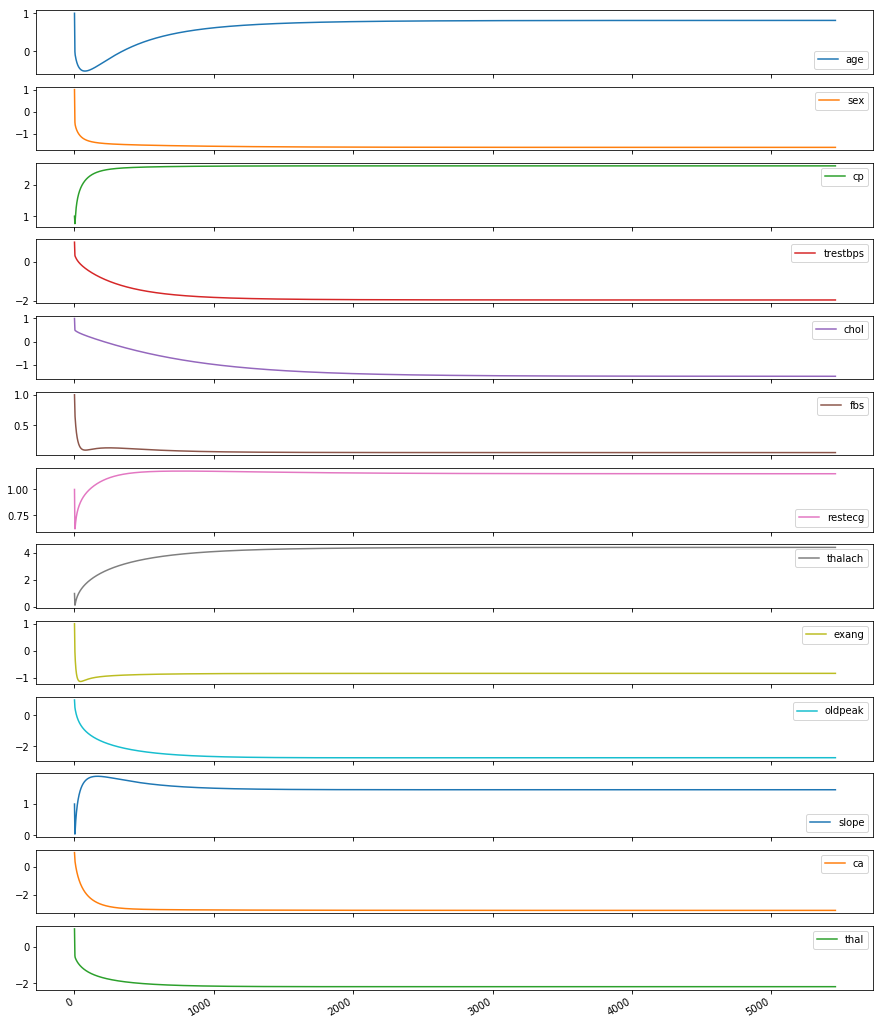

In [43]:
weights_df = pd.DataFrame(weights_array, columns = X.columns)
print(weights_df.head())
weights_df.plot(subplots = True, figsize = (15, 20))
print(weights)

## sci-kit learn

For comparison, import sci-kit learn's standard LogisticRegression function. Initialize a regression object with **no intercept** and with **C=1e16** or another very high number. The reason is as follows: our implementation has not used an intercept, and we have not performed any regularization such as Lasso or Ridge (sci-kit learn uses l2 by default). The high value of C will essentially negate this.

After initializing a regression object, fit it to X and y.

In [46]:
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16)
logreg.fit(X, y)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Compare the models

Compare the coefficient weights of your model to that generated by sci-kit learn.

In [49]:
# Your code here
print(weights)
print(logreg.coef_[0])

[ 0.81214799 -1.61290617  2.61778166 -1.96883986 -1.50905766  0.0569839
  1.15225666  4.42085225 -0.83034332 -2.74662129  1.4557845  -3.11546479
 -2.19129529]
[ 0.81221467 -1.61293693  2.6179496  -1.96887354 -1.50936862  0.05688225
  1.1521945   4.42098698 -0.83027951 -2.74686109  1.45580368 -3.115599
 -2.19130405]


## Level - Up

Update the gradient descent algorithm to also return the prediction error after each iteration. Then rerun the algorithm and create a graph displaying the prediction errors versus the iteration number.

In [ ]:
# Your code here

## Additional Resources

If you want to see more of the mathematics behind the gradient derivation above, check out section 4.4.1 from the Elements of Statistical Learning which can be found here: https://web.stanford.edu/~hastie/ElemStatLearn//.

## Summary

Congratulations! You just coded logistic regression from the ground up using NumPy! With this, you should have a fairly deep understanding of logistic regression and how the algorithm works! In the upcoming labs, we'll continue to explore this from a few more angles, plotting our data along with the decision boundary for our predictions.